# Racial Distributions of Delaware Public Schools

## Background

The State of Delaware has a long and checkered history of systematic racism within it's public school system. Although the State has recently taken steps to address its inherent biases, such as a [lawsuit settlement](https://www.aclu-de.org/en/news/press-release-agreement-reached-county-track-public-schools-litigation) to reasses property values in New Castle County, with the goal of equalizing funding across school districts. Underlying distrust and discriminatory practices still exsist within the public schoool system. This is most prevelent in New Castle Country which is home to the largest percentage of Non-white population in Delaware [See Chart #41 "Non-White Population by County](https://statisticalatlas.com/county/Delaware/New-Castle-County/Race-and-Ethnicity#top) for a detailed breakdown. One often cited cause of Delaware's school segregation problem is the practice of Desegregation busing that occured within New Castle County between 1974 and 1994. With this policy ennacted under-served primarily African American students living within the City of Wilmington were sent to schools in the more affulent and primarily White surronding suburbs. Conversly, the students living in the suburbs of Wilmington were bussed to historically majority African American schools within the city. This practice angered a large amount of parents in the suburbs who did not their children attending school within the city, leading to a concerning distruct in the public school system within the suburban white communities. Subsequently, this sense of distust lead to a mass exodus of White students from the public school system and spurring the overwhelming prevelence of private schools in Delaware. 

## Research Objectives
Through my analysis I intend to demonstrate that the distrust and marginalization of the Delaware Public School System by the White community is not a relic of the past and still persists to this day. In order to achive this goal I aim to analyze the recent enrollment trends to the schoool systemn and explain the implications these trends on the school funding system, as well as how the currently fudning system contributes to the aforementioned trends in enrollment. The research questions I asked are as follows:
* What are the enrollment trends of Delaware Public Students broken down by Race?
* How significant are the curernt enrollment trends?
* How and which districts are most affectd by the changes in student enrollment?


## Data Source

The following analysis was done using a publicly available data set provided by the Delaware State Government and which is used to allocate yearly funding and resources to schools within the state.  
[Delaware Enrollment Data Set](https://data.delaware.gov/Education/Student-Enrollment/6i7v-xnmf)


## Data Set Overview

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats


df = pd.read_csv("data/Student_Enrollment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738465 entries, 0 to 738464
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   School Year         738465 non-null  int64  
 1   District Code       738465 non-null  int64  
 2   District            738465 non-null  object 
 3   School Code         738465 non-null  int64  
 4   Organization        738465 non-null  object 
 5   Race                738465 non-null  object 
 6   Gender              738465 non-null  object 
 7   Grade               738465 non-null  object 
 8   SpecialDemo         738465 non-null  object 
 9   Geography           738465 non-null  object 
 10  SubGroup            738465 non-null  object 
 11  RowStatus           738465 non-null  object 
 12  Students            401049 non-null  float64
 13  EOYEnrollment       738157 non-null  float64
 14  PctOfEOYEnrollment  401049 non-null  float64
 15  FallEnrollment      660484 non-nul

### Column Descriptions.  
***School Year***: School Year from which the data was collected.  
***District Code***: Number unique the each distinct district.  
***District***: Name of each district.  
***School Code***: Number representing a school within a district.  
***Organization***: Full name of the Organization.  
***Race***: Represents the race/ethnicity of the unique group of students within the school/district.  
***Gender***: Represents the gender of students within the school/district.  
***Grade***: Grade level of the unqiue group of studetns.  
***Special Demo***: Represents the special population status of the unique group of students.  
***Geography***: Represents the geography of the unique group of students.  
***SubGroup***: Represents the unique group of students within a schhool/district described by the combination of Race, Gender, Grade, SpecialDemo and Geography.  
***RowStatus***: Indicates whether the aggregate data in the row has been Redacted or Reported. If redacted, certain data has been hidden to comply with state and federal privacy laws.  
***Students***: Number of students enrolled at the end of the school year.
***PctOfEOYEnrollment***: The percentage of students enrolled for the specified subgroup divided by the number of students enrolled at the end of the school year.  
***FallEnrollment***: The number of studnets enrolled on September 30th of the specified school year.  
 


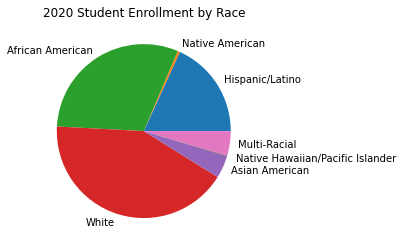

In [55]:
#Isolating State Wide Data
all = "All Students"
all_years = df.loc[(df["District"] == "State of Delaware") & (df["Gender"] == all) & (df["Grade"] == all) & (df["SpecialDemo"] == all) & (df["Geography"] == all)]
indexs = all_years[all_years["Race"] == "All Students"].index
all_years = all_years.drop(indexs)
y2020 = all_years[all_years["School Year"] == 2020]
y2019 = all_years[all_years["School Year"] == 2019]
plt.pie(y2020["Students"], labels=y2020["Race"])
plt.title("2020 Student Enrollment by Race")
plt.show()

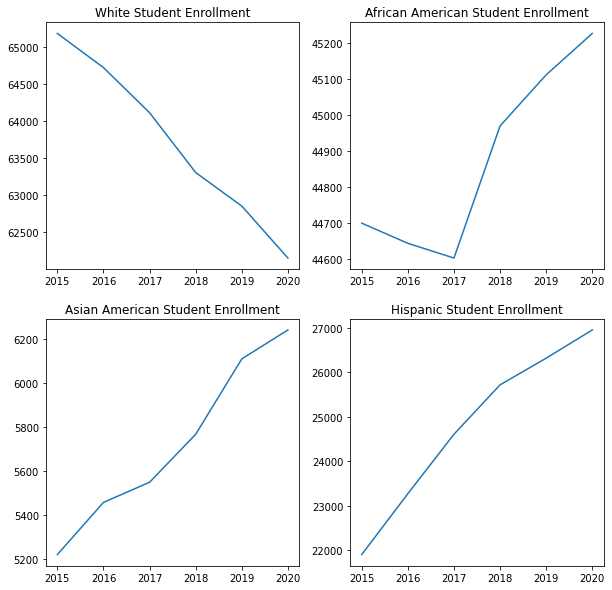

In [75]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(all_years[all_years["Race"] == "White"]["School Year"].values, all_years[all_years["Race"] == "White"]["Students"].values)
ax1.title.set_text("White Student Enrollment")
ax2.plot(all_years[all_years["Race"] == "African American"]["School Year"].values, all_years[all_years["Race"] == "African American"]["Students"].values)
ax2.title.set_text("African American Student Enrollment")
ax3.plot(all_years[all_years["Race"] == "Asian American"]["School Year"].values, all_years[all_years["Race"] == "Asian American"]["Students"].values)
ax3.title.set_text("Asian American Student Enrollment")
ax4.plot(all_years[all_years["Race"] == "Hispanic/Latino"]["School Year"].values, all_years[all_years["Race"] == "Hispanic/Latino"]["Students"].values)
ax4.title.set_text("Hispanic Student Enrollment")

### Calculating Pearson's r For Each Group

In [76]:
years = [2015,2016,2017,2018,2019,2020]
White_enrollment_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "White"],years)
African_American_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "African American"], years)
Asian_American_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "Asian American"], years)
Hispanic_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "Hispanic/Latino"], years)

print("White Student Enrollment r: ", White_enrollment_r[0])
print("African American Student Enrollment r: ", African_American_r[0])
print("Asian American r: ", Asian_American_r[0])
print("Hispanic/Latino r: ", Hispanic_r[0])

White Student Enrollment r:  -0.9974150969419623
African American Student Enrollment r:  0.8939061809517638
Asian American r:  0.9892662569850617
Hispanic/Latino r:  0.9851881711114994


### Plotting Percent Change in Enrollment 

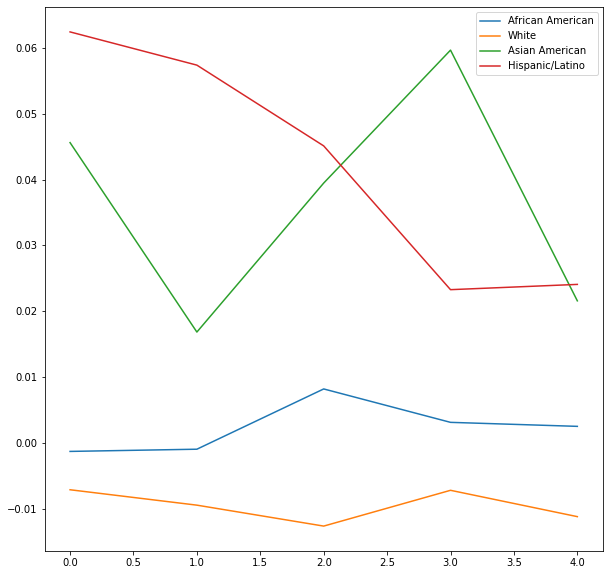

In [78]:
African_American_pct = all_years["Students"][all_years["Race"] == "African American"].pct_change().dropna()
White_pct = all_years["Students"][all_years["Race"] == "White"].pct_change().dropna()
Asian_American_pct = all_years["Students"][all_years["Race"] == "Asian American"].pct_change().dropna()
Hispanic_pct = all_years["Students"][all_years["Race"] == "Hispanic/Latino"].pct_change().dropna()

plt.figure(figsize = (10,10))
plt.plot(African_American_pct.values, label = "African American")
plt.plot(White_pct.values, label = "White")
plt.plot(Asian_American_pct.values, label = "Asian American")
plt.plot(Hispanic_pct.values, label = "Hispanic/Latino")
plt.legend(["African American", "White", "Asian American", "Hispanic/Latino"])
plt.show()